In [2]:
pip install control

     ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
     --------------------------------- --- 522.2/578.3 kB 16.5 MB/s eta 0:00:01
     ------------------------------------- 578.3/578.3 kB 12.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Controllability matrix:
 [[ 0.232       1.078394   -1.01071374]
 [ 0.0203     -0.0118726  -0.00993195]
 [ 0.          1.15101    -0.67317642]]
Rank: 3
Controllable: True


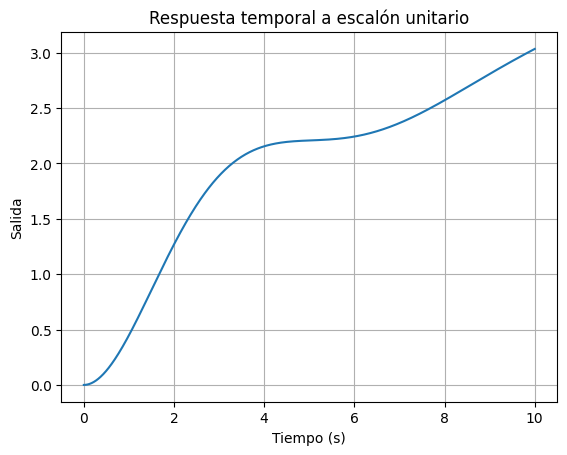

In [26]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Matrices (Python / NumPy syntax)
A = np.array([[-0.313, 56.7, 0.0],
              [-0.0139, -0.426, 0.0],
              [0.0, 56.7, 0.0]])
B = np.array([[0.232],
              [0.0203],
              [0.0]])
C = np.array([[0.0, 0.0, 1.0]])
D = np.array([[0.0]])

# --- Celda 1: controlabilidad y sistema en espacio de estados ---
# Matriz de controlabilidad
Co = ct.ctrb(A, B)
rank_co = np.linalg.matrix_rank(Co)
is_controllable = rank_co == A.shape[0]

print("Controllability matrix:\n", Co)
print("Rank:", rank_co)
print("Controllable:", is_controllable)

# Crear sistema en espacio de estados con python-control
sys = ct.ss(A, B, C, D)

# --- Celda 2: respuesta temporal ante escalón unitario ---
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario
T_out, y_out = ct.forced_response(sys, T=T, U=U)

# Graficar salida
plt.figure()
plt.plot(T_out, y_out, linewidth=1.5)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.show()


State-feedback gain matrix K:
 [[-1021.73033383 12330.16933247  1127.26881872]]

Closed-loop eigenvalues:
 [ -2.+4.j  -2.-4.j -10.+0.j]


C:\Users\lauch\AppData\Local\Temp\ipykernel_26664\1469456950.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


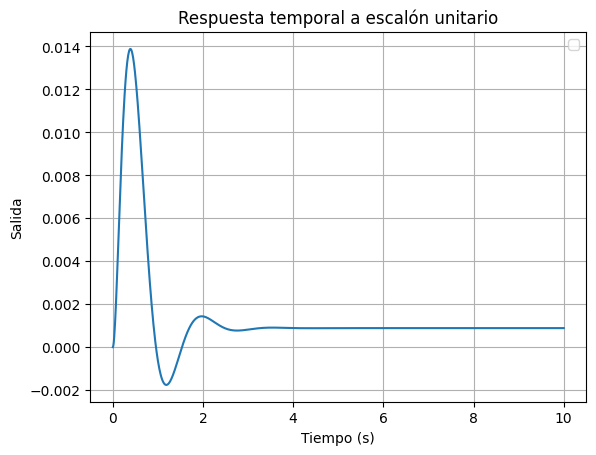

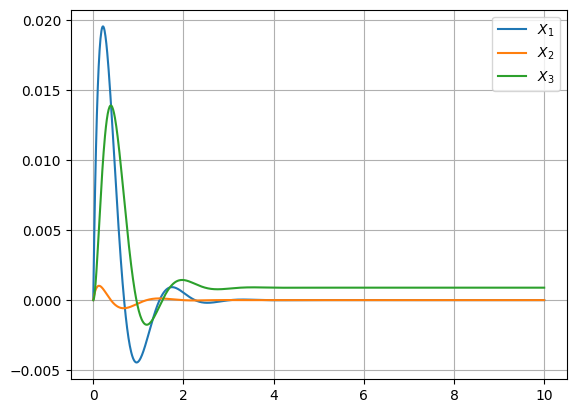

In [43]:
# --- Celda 3: diseño de realimentación de estados (Ackermann) y root locus ---
# Ganancias por ubicación de polos (Ackermann)
J = [-2+1j*4, -2-1j*4, -10] # Polos deseados
K = ct.acker(A, B, J)  
K=np.array([K])  # Convertir en matriz fila
print("\nState-feedback gain matrix K:\n", K)

# Verificar autovalores del lazo cerrado
A_cl = A - B@K
print("\nClosed-loop eigenvalues:\n", np.linalg.eigvals(A_cl))

sys = ct.ss(A_cl, B, C, D)

# --- Celda 2: respuesta temporal ante escalón unitario ---
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario
T_out, y_out, x_out = ct.forced_response(sys, T=T, U=U, return_x=True)

# Graficar salida
plt.figure()
plt.plot(T_out, y_out, linewidth=1.5)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()
plt.figure()
plt.plot(T_out, x_out[0], linewidth=1.5, label='$X_1$')
plt.plot(T_out, x_out[1], linewidth=1.5, label='$X_2$')
plt.plot(T_out, x_out[2], linewidth=1.5, label='$X_3$')
plt.legend()
plt.grid(True)
plt.show()


Ogata

Controllability matrix:
 [[ 0.  0.  1.]
 [ 0.  1. -6.]
 [ 1. -6. 31.]]
Rank: 3
Controllable: True

State-feedback gain matrix K:
 [[199.  55.   8.]]

Closed-loop eigenvalues:
 [ -2.+4.j  -2.-4.j -10.+0.j]


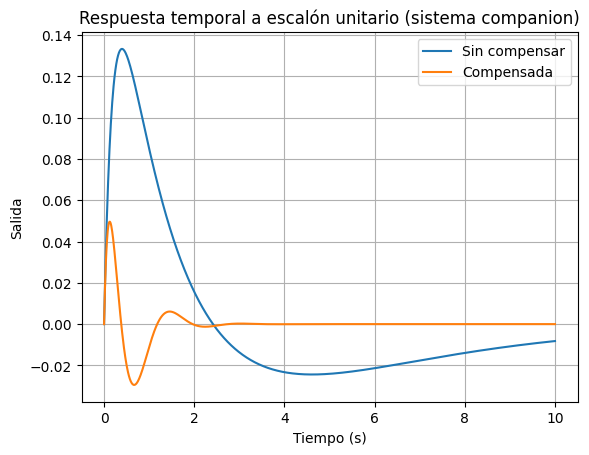

In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Matrices (Python / NumPy syntax) - sistema ejemplo tipo companion
A = np.array([[0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0],
              [-1.0, -5.0, -6.0]])
B = np.array([[0.0],
              [0.0],
              [1.0]])
C = np.array([[0.0, 0.0, 1.0]])
D = np.array([[0.0]])

# Controlabilidad y creación del sistema
Co = ct.ctrb(A, B)
rank_co = np.linalg.matrix_rank(Co)
is_controllable = rank_co == A.shape[0]

print("Controllability matrix:\n", Co)
print("Rank:", rank_co)
print("Controllable:", is_controllable)

sys = ct.ss(A, B, C, D)

# Respuesta temporal a escalón unitario
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario (1D aceptado por ct.forced_response)
T_out, y_out = ct.forced_response(sys, T=T, U=U)

J = [-2+1j*4, -2-1j*4, -10] # Polos deseados
K = ct.acker(A, B, J)  
K = np.asarray(K).reshape(1, -1)  # asegurar forma (1, n) como fila
print("\nState-feedback gain matrix K:\n", K)

# Verificar autovalores del lazo cerrado
A_cl = A - B@K
print("\nClosed-loop eigenvalues:\n", np.linalg.eigvals(A_cl))
print("\nOpen-loop eigenvalues:\n", np.linalg.eigvals(A))

sysc = ct.ss(A_cl, B, C, D)

# --- Celda 2: respuesta temporal ante escalón unitario ---
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario
Tc_out, yc_out, xc_out = ct.forced_response(sysc, T=T, U=U, return_x=True)

# Graficar salida
plt.figure()
plt.plot(T_out, y_out, linewidth=1.5,label='Sin compensar')
plt.plot(Tc_out, yc_out, linewidth=1.5,label='Compensada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario (sistema companion)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("\nClosed-loop eigenvalues:\n", np.linalg.eigvals(A_cl))
print("\nOpen-loop eigenvalues:\n", np.linalg.eigvals(A))


Closed-loop eigenvalues:
 [ -2.+4.j  -2.-4.j -10.+0.j]

Open-loop eigenvalues:
 [-5.04891734 -0.30797853 -0.64310413]


In [23]:
Go, T = ct.canonical_form(sys, 'observable')
print(Go)
Gr, T = ct.canonical_form(sys, 'reachable')
print(Gr)

<StateSpace>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-6.  1.  0.]
     [-5.  0.  1.]
     [-1.  0.  0.]]

B = [[ 1.00000000e+00]
     [ 2.55351296e-15]
     [-5.32907052e-15]]

C = [[1. 0. 0.]]

D = [[0.]]

<StateSpace>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-6. -5. -1.]
     [ 1.  0.  0.]
     [ 0.  1.  0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[ 1.00000000e+00  1.77635684e-15 -1.06581410e-14]]

D = [[0.]]




Open-loop eigenvalues:
 [ 4.53872229 -4.53872229]

Closed-loop eigenvalues:
 [-1.+5.j -1.-5.j]


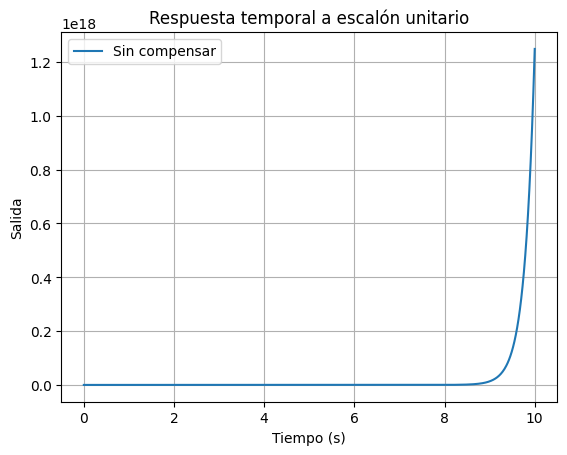

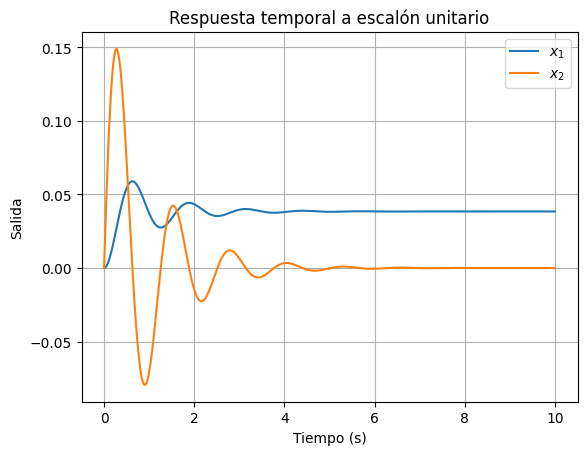


A Observable:
 [[-0.   1. ]
 [20.6  0. ]]

A Reachable:
 [[-0.  20.6]
 [ 1.   0. ]]


In [69]:
##PPT CLASE 23

import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Matrices (Python / NumPy syntax) - sistema ejemplo tipo companion
A = np.array([[0, 1],
              [20.6, 0]])
B = np.array([[0.0],
              [1.0]])
C = np.array([[1, 0]])
D = np.array([[0.0]])

sys = ct.ss(A, B, C, D)

# Respuesta temporal a escalón unitario
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario (1D aceptado por ct.forced_response)
T_out, y_out = ct.forced_response(sys, T=T, U=U)

#J = [-2, -1] # Polos deseados
J = [-1+5j, -1-5j]
K = ct.acker(A, B, J)  
K = np.asarray(K).reshape(1, -1)  # asegurar forma (1, n) como fila

A_cl = A - B@K
sysc = ct.ss(A_cl, B, C, D)

print("\nOpen-loop eigenvalues:\n", np.linalg.eigvals(A))
print("\nClosed-loop eigenvalues:\n", np.linalg.eigvals(A_cl))

T = np.linspace(0, 10, 1000)
T, y, x = ct.step_response(sys, T=T, return_x=True)
Tc, yc, xc = ct.step_response(sysc, T=T, return_x=True)

# Graficar salida
plt.figure()
plt.plot(T, y, linewidth=1.5,label='Sin compensar')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(Tc, yc, linewidth=1.5,label='$x_1$')
plt.plot(Tc, xc[1], linewidth=1.5,label='$x_2$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()
plt.show()

Go, T = ct.canonical_form(sys, 'observable')
print("\nA Observable:\n",Go.A)
Gr, T = ct.canonical_form(sys, 'reachable')
print("\nA Reachable:\n",Gr.A)

In [67]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Matrices (Python / NumPy syntax)
A = np.array([[1, 5],
              [8, 4]])
B = np.array([[-2],
              [2]])
C = np.array([[1, 1]])
D = np.array([[0.0]])

sys = ct.ss(A, B, C, D)

Co = np.hstack([B, A@B]) #Co = ct.ctrb(A, B)
rank_co = np.linalg.matrix_rank(Co)
is_controllable = rank_co == A.shape[0]

print("Controllability matrix:\n", Co)
print("Rank:", rank_co)
print("Controllable:", is_controllable)

#Go, T = ct.canonical_form(sys, 'observable')
#print(Go.A)
#Gr, T = ct.canonical_form(sys, 'reachable')
#print(Gr.A)


Controllability matrix:
 [[-2  8]
 [ 2 -8]]
Rank: 1
Controllable: False


Controllability matrix:
 [[ 0.  0.  1.]
 [ 0.  1. -6.]
 [ 1. -6. 31.]]
Rank: 3
Controllable: True

Open-loop eigenvalues:
 [-5.04891734 -0.30797853 -0.64310413]

Closed-loop eigenvalues:
 [ -2.+4.j  -2.-4.j -10.+0.j]

A Observable:
 [[-6.  1.  0.]
 [-5.  0.  1.]
 [-1.  0.  0.]]

A Reachable:
 [[-6. -5. -1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


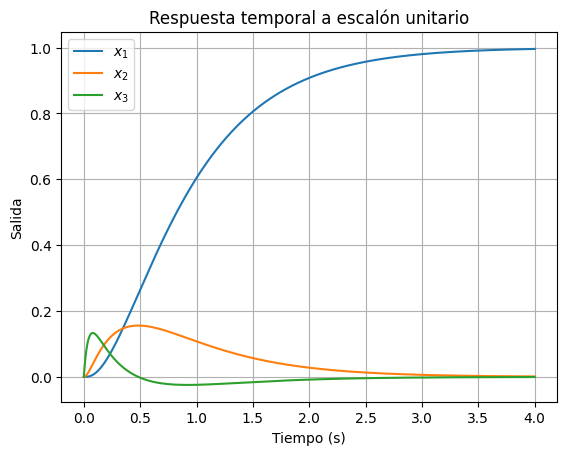

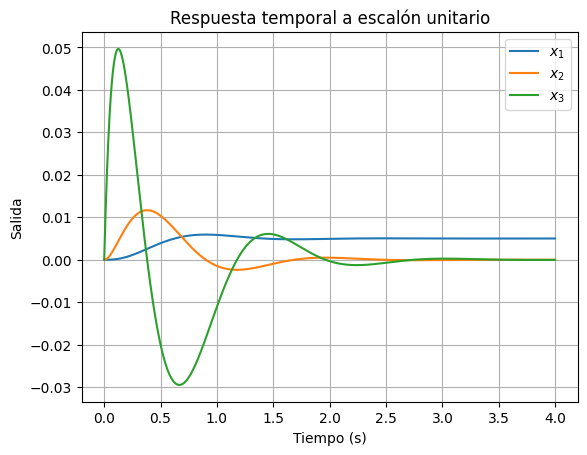

In [77]:
##PPT CLASE 23

import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Matrices (Python / NumPy syntax) - sistema ejemplo tipo companion
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-1, -5, -6]])
B = np.array([[0.0],
              [0.0],
              [1.0]])
C = np.array([[1, 0, 0]])
D = np.array([[0.0]])

sys = ct.ss(A, B, C, D)

Co = ct.ctrb(A, B)
rank_co = np.linalg.matrix_rank(Co)
is_controllable = rank_co == A.shape[0]

print("Controllability matrix:\n", Co)
print("Rank:", rank_co)
print("Controllable:", is_controllable)

# Respuesta temporal a escalón unitario
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario (1D aceptado por ct.forced_response)
T_out, y_out = ct.forced_response(sys, T=T, U=U)

#J = [-2, -1] # Polos deseados
J = [-2+4j, -2-4j, -10]
K = ct.acker(A, B, J)  
K = np.asarray(K).reshape(1, -1)  # asegurar forma (1, n) como fila

A_cl = A - B@K
sysc = ct.ss(A_cl, B, C, D)

print("\nOpen-loop eigenvalues:\n", np.linalg.eigvals(A))
print("\nClosed-loop eigenvalues:\n", np.linalg.eigvals(A_cl))

T = np.linspace(0, 20, 1000)
T, y, x = ct.step_response(sys, T=T, return_x=True)
T = np.linspace(0, 4, 1000)
Tc, yc, xc = ct.step_response(sysc, T=T, return_x=True)

Go, T = ct.canonical_form(sys, 'observable')
print("\nA Observable:\n",Go.A)
Gr, T = ct.canonical_form(sys, 'reachable')
print("\nA Reachable:\n",Gr.A)

# Graficar salida
plt.figure()
plt.plot(Tc, x[0], linewidth=1.5,label='$x_1$')
plt.plot(Tc, x[1], linewidth=1.5,label='$x_2$')
plt.plot(Tc, x[2], linewidth=1.5,label='$x_3$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(Tc, xc[0], linewidth=1.5,label='$x_1$')
plt.plot(Tc, xc[1], linewidth=1.5,label='$x_2$')
plt.plot(Tc, xc[2], linewidth=1.5,label='$x_3$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()
plt.show()

Controllability matrix:
 [[ 0. -1.]
 [ 1.  0.]]
Rank: 2
Controllable: True


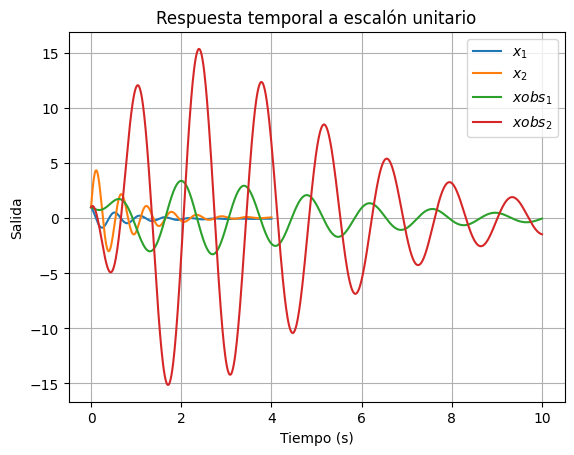

In [18]:
##PPT CLASE 23

import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Matrices (Python / NumPy syntax) - sistema ejemplo tipo companion
A = np.array([[-1, -1],
              [20.6, 0]])
B = np.array([[0.0],
              [1.0]])
C = np.array([[1, 0]])
D = np.array([[0.0]])

sys = ct.ss(A, B, C, D)

Co = ct.ctrb(A, B)
rank_co = np.linalg.matrix_rank(Co)
is_controllable = rank_co == A.shape[0]

print("Controllability matrix:\n", Co)
print("Rank:", rank_co)
print("Controllable:", is_controllable)

#J = [-2, -1] # Polos deseados
J = [-5, -5]
K = ct.acker(A, B, J)  
K = np.asarray(K).reshape(1, -1)  # asegurar forma (1, n) como fila

# Respuesta temporal a escalón unitario
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario (1D aceptado por ct.forced_response)
T_out, y_out, x_out = ct.forced_response(sys, T=T, U=U, return_x=True, X0=[1,1])

# Respuesta temporal estimador
T = np.linspace(0, 10, 1000)
U = -K@x_out           # escalón unitario (1D aceptado por ct.forced_response)
T_obs, y_obs, x_obs = ct.forced_response(sys, T=T, U=U, return_x=True, X0=[1,1])

# Graficar salida
plt.figure()
plt.plot(Tc, x_out[0], linewidth=1.5,label='$x_1$')
plt.plot(Tc, x_out[1], linewidth=1.5,label='$x_2$')
plt.plot(T_obs, x_obs[0], linewidth=1.5,label='$xobs_1$')
plt.plot(T_obs, x_obs[1], linewidth=1.5,label='$xobs_2$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()
plt.show()


Open-loop eigenvalues:
 [ 4.53872229 -4.53872229]

Closed-loop eigenvalues:
 [-10. -10.]

K:
 [[ 5.85436893 20.        ]]

A_cl
 [[  0.          20.6       ]
 [ -4.85436893 -20.        ]]

A Observable:
 [[-0.   1. ]
 [20.6  0. ]]

A Reachable:
 [[-0.  20.6]
 [ 1.   0. ]]


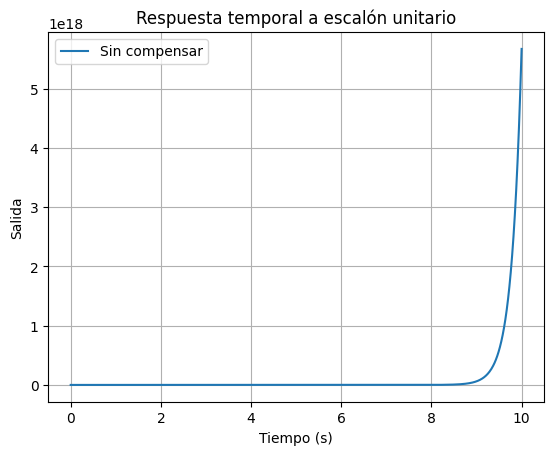

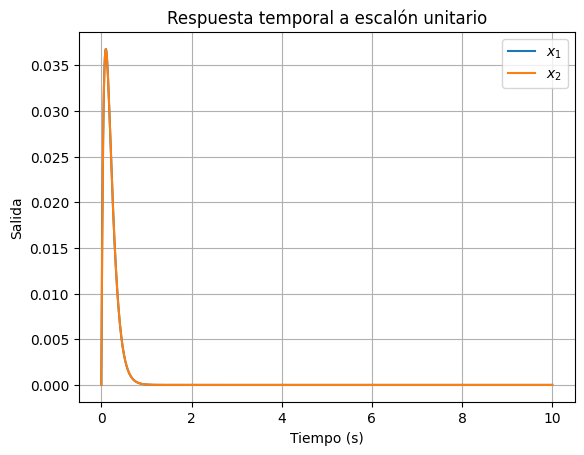

In [6]:
## OGATA EJ: 10-6

import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Matrices (Python / NumPy syntax) - sistema ejemplo tipo companion
A = np.array([[0, 20.6],
              [1, 0]])
B = np.array([[0.0],
              [1.0]])
C = np.array([[0, 1]])
D = np.array([[0.0]])

sys = ct.ss(A, B, C, D)

# Respuesta temporal a escalón unitario
T = np.linspace(0, 10, 1000)
U = np.ones_like(T)               # escalón unitario (1D aceptado por ct.forced_response)
T_out, y_out = ct.forced_response(sys, T=T, U=U)

J = [-10, -10] # Polos deseados
K = ct.acker(A, C.T, J)  
K = np.asarray(K).reshape(1, -1)  # asegurar forma (1, n) como fila

A_cl = A - C.T@K
sysc = ct.ss(A_cl, B, C, D)

print("\nOpen-loop eigenvalues:\n", np.linalg.eigvals(A))
print("\nClosed-loop eigenvalues:\n", np.linalg.eigvals(A_cl))
print("\nK:\n", K)

print("\nA_cl\n",A_cl)
Go, T = ct.canonical_form(sys, 'observable')
print("\nA Observable:\n",Go.A)
Gr, T = ct.canonical_form(sys, 'reachable')
print("\nA Reachable:\n",Gr.A)

T = np.linspace(0, 10, 1000)
T, y, x = ct.step_response(sys, T=T, return_x=True)
Tc, yc, xc = ct.step_response(sysc, T=T, return_x=True)

# Graficar salida
plt.figure()
plt.plot(T, y, linewidth=1.5,label='Sin compensar')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(Tc, yc, linewidth=1.5,label='$x_1$')
plt.plot(Tc, xc[1], linewidth=1.5,label='$x_2$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.title('Respuesta temporal a escalón unitario')
plt.grid(True)
plt.legend()
plt.show()



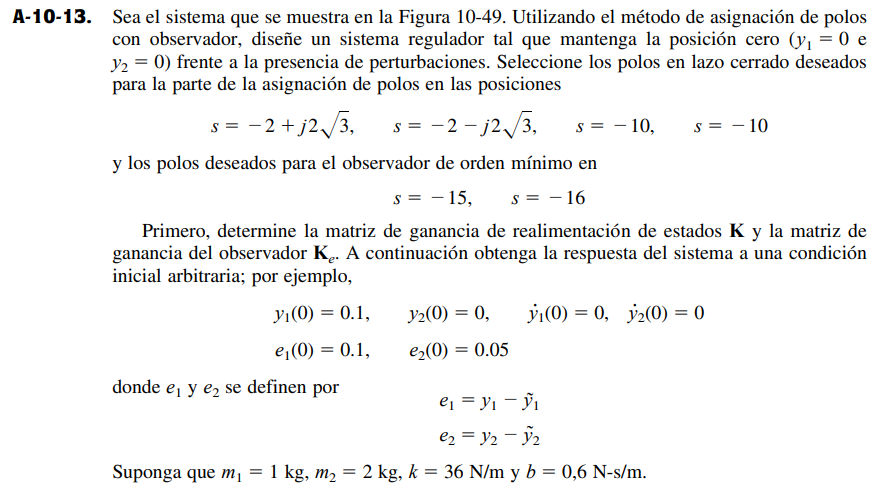

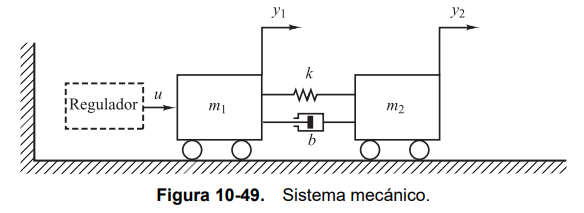

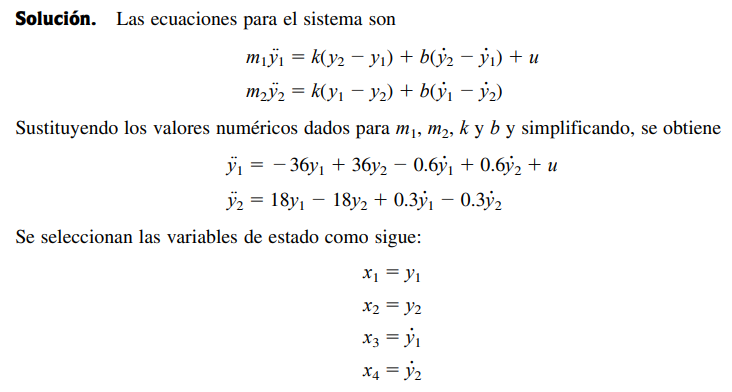

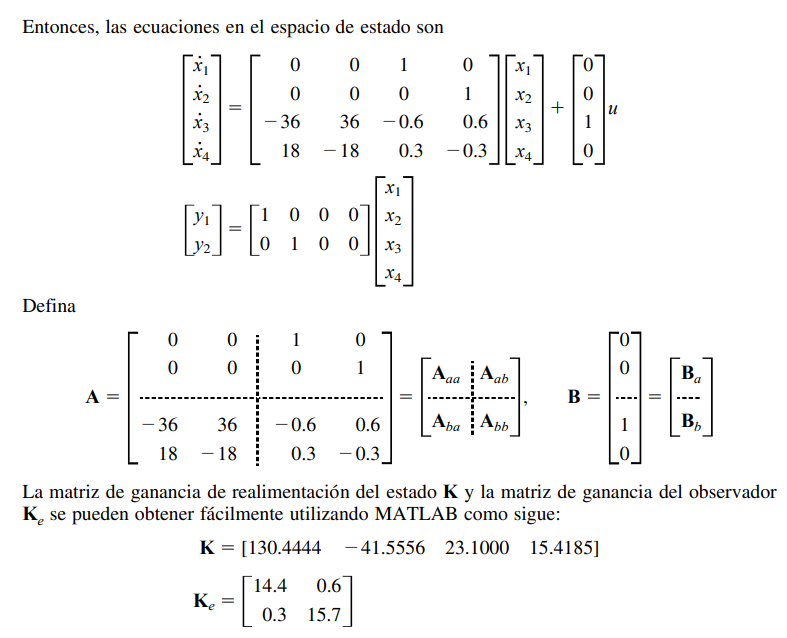

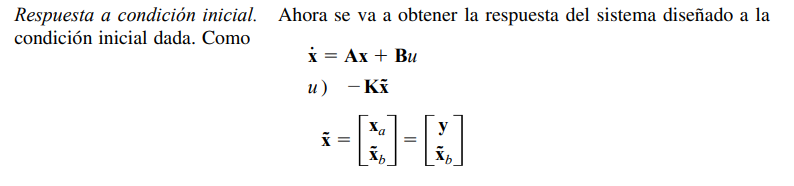

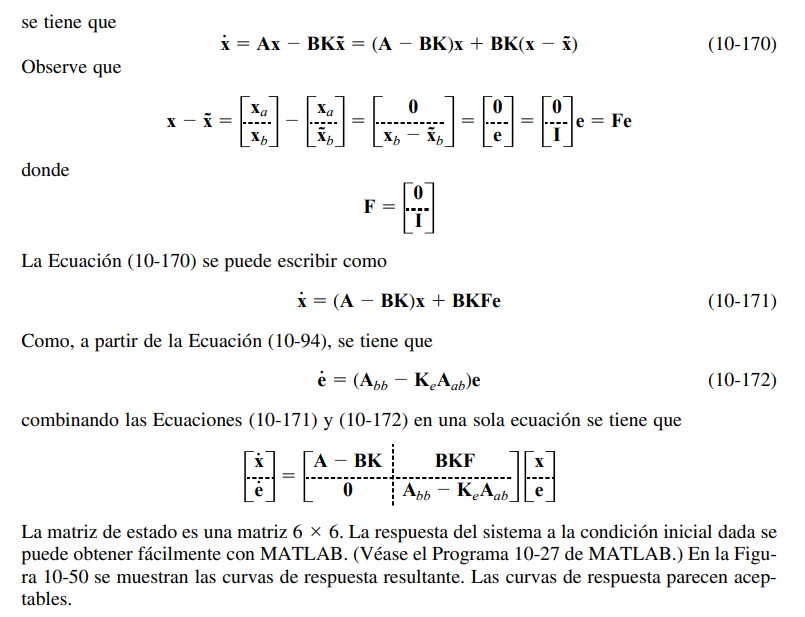

In [3]:
import numpy as np
import control as ct

# System matrices (converted from MATLAB row/col format)
A = np.array([
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0],
    [-36.0, 36.0, -0.6, 0.6],
    [18.0, -18.0, 0.3, -0.3]
])
B = np.array([[0.0], [0.0], [1.0], [0.0]])

# Desired closed-loop poles (J)
# MATLAB: J = [–2!j*2*sqrt(3) –2 – j*2*sqrt(3) –10 –10];
# Interpreting as complex conjugate pair at -2 +/- j*2*sqrt(3), and two real -10's
p_complex = -2 + 1j * 2 * np.sqrt(3)
p_conj    = -2 - 1j * 2 * np.sqrt(3)
J = [p_complex, p_conj, -10.0, -10.0]

# Compute state-feedback K using Ackermann (ct.acker)
# ct.acker returns a 1D array of gains for single-input systems; for multi-dimensional
# we will reshape to a row vector to match MATLAB's output style.
K = ct.acker(A, B, J)        # returns 1D array-length 4
K = np.asarray(K).reshape(1, -1)

# Print K with formatting similar to your example
np.set_printoptions(precision=4, suppress=True)
print("K =")
print(K)

# Partition A into Aab and Abb as in your MATLAB snippet:
# Aab = [1 0; 0 1]; Abb = [-0.6 0.6; 0.3 -0.3];
Aab = np.array([[1.0, 0.0],
                [0.0, 1.0]])
Abb = np.array([[-0.6, 0.6],
                [0.3, -0.3]])

# Desired observer poles L (as used in place(Abb',Aab',L) in MATLAB)
L = np.array([-15.0, -16.0])

# MATLAB did: Ke = place(Abb',Aab',L)'.
# In python-control, place(A, B, poles) places poles for x' = A x + B u.
# Since MATLAB used Abb' and Aab', we transpose to match and then transpose result.
Ke_T = ct.place(Abb.T, Aab.T, L)   # places gains for (Abb.T, Aab.T)
Ke = Ke_T.T                         # transpose to match MATLAB final '
print("\nKe =")
print(Ke)

K =
[[130.4444 -41.5556  23.1     15.4185]]

Ke =
[[15.4  0.6]
 [ 0.3 14.7]]


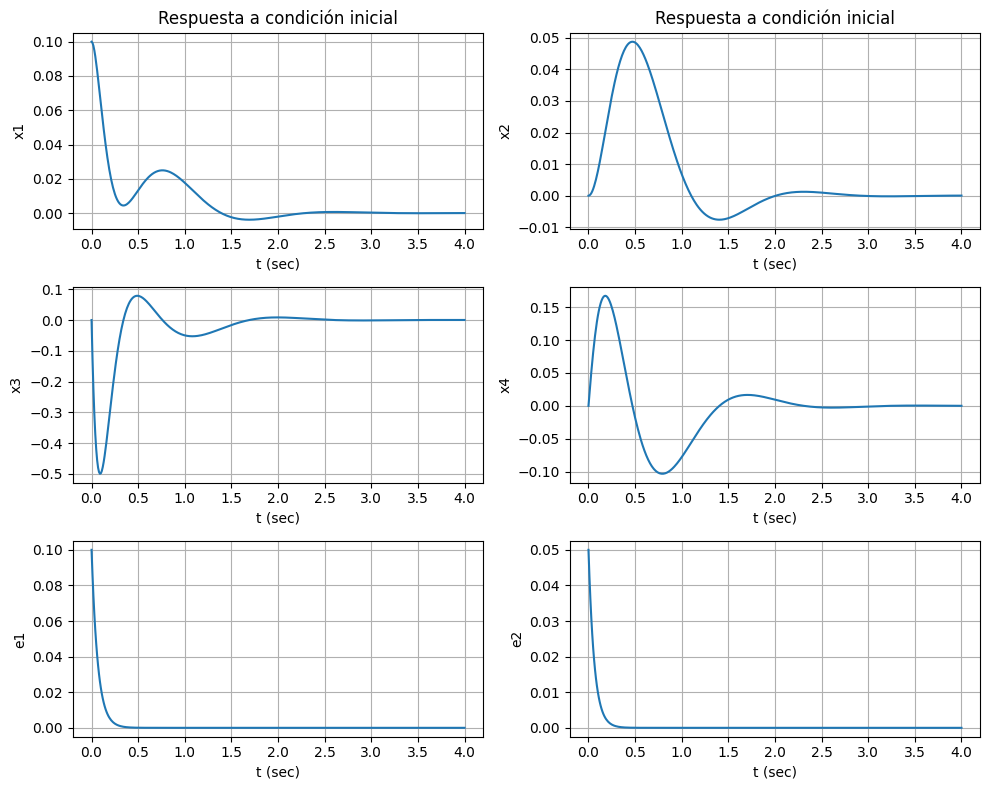

In [5]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Define matrices
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-36, 36, -0.6, 0.6],
    [18, -18, 0.3, -0.3]
])
B = np.array([[0], [0], [1], [0]])
K = np.array([[130.4444, -41.5556, 23.1000, 15.4185]])
Ke = np.array([[14.4, 0.6], [0.3, 15.7]])
F = np.array([[0, 0], [0, 0], [1, 0], [0, 1]])
Aab = np.array([[1, 0], [0, 1]])
Abb = np.array([[-0.6, 0.6], [0.3, -0.3]])

# Compute augmented matrix AA
AA = np.block([
    [A - B @ K, B @ K @ F],
    [np.zeros((2, 4)), Abb - Ke @ Aab]
])

# Create state-space system
sys = ct.ss(AA, np.eye(6), np.eye(6), np.eye(6))

# Time vector and initial condition
T = np.linspace(0, 4, 401)  # 0 to 4 seconds, step 0.01
X0 = [0.1, 0, 0, 0, 0.1, 0.05]

# Compute initial condition response
time, y = ct.initial_response(sys, T, X0)

# Extract states and errors
x1 = y[0, :]
x2 = y[1, :]
x3 = y[2, :]
x4 = y[3, :]
e1 = y[4, :]
e2 = y[5, :]

# Plot results
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(time, x1)
plt.grid()
plt.title('Respuesta a condición inicial')
plt.xlabel('t (sec)')
plt.ylabel('x1')

plt.subplot(3, 2, 2)
plt.plot(time, x2)
plt.grid()
plt.title('Respuesta a condición inicial')
plt.xlabel('t (sec)')
plt.ylabel('x2')

plt.subplot(3, 2, 3)
plt.plot(time, x3)
plt.grid()
plt.xlabel('t (sec)')
plt.ylabel('x3')

plt.subplot(3, 2, 4)
plt.plot(time, x4)
plt.grid()
plt.xlabel('t (sec)')
plt.ylabel('x4')

plt.subplot(3, 2, 5)
plt.plot(time, e1)
plt.grid()
plt.xlabel('t (sec)')
plt.ylabel('e1')

plt.subplot(3, 2, 6)
plt.plot(time, e2)
plt.grid()
plt.xlabel('t (sec)')
plt.ylabel('e2')

plt.tight_layout()
plt.show()